# K-NN, XGBOOST and RANDOM FOREST model

In [9]:
import os
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import random

# Load the dataset
btc_data = pd.read_csv('BTC-USD.csv')
# Changing Date format
btc_data['Date'] = pd.to_datetime(btc_data['Date'], format='%Y-%m-%d')
# Filter data by date
btc_data = btc_data.loc[(btc_data['Date'] >= '2014-09-17') & (btc_data['Date'] <= '2023-09-30')]
# Drop 'Adj Close' and 'Volume'
btc_data = btc_data.drop(['Adj Close', 'Volume'], axis=1)
# Set 'Date' as the index for the DataFrame
btc_data.set_index('Date', inplace=True)

# Prepare data for training and testing
start_train = '2014-09-17'
end_train = '2022-09-08'
train_df = btc_data.loc[(btc_data.index >= start_train) & (btc_data.index <= end_train)]
test_df = btc_data.loc[btc_data.index > end_train]
target_col = 'Close' # To be predicted
# Convert DataFrames to NumPy arrays
Xtrain2 = train_df.drop(columns=[target_col]).to_numpy()
ytrain2 = train_df[target_col].to_numpy()
Xtest2 = test_df.drop(columns=[target_col]).to_numpy()
ytest2 = test_df[target_col].to_numpy()
Xtrain2.shape, ytrain2.shape, Xtest2.shape, ytest2.shape
# Define a function for preprocessing
min_max_scaler = MinMaxScaler().fit(Xtrain2[:,:3])
def preprocessor(X):
    A = np.copy(X)
    A[:, :3] = min_max_scaler.transform(X[:, :3])
    return A
# Create a FunctionTransformer
preprocess_transformer = FunctionTransformer(preprocessor)
# Define a function for fitting and testing the model
def fit_and_test(p, Xtrain2=Xtrain2, ytrain2=ytrain2, Xtest2=Xtest2, ytest2=ytest2):
    p.fit(Xtrain2, ytrain2)
    train_preds = p.predict(Xtrain2)
    test_preds = p.predict(Xtest2)
    train_mae = mean_absolute_error(train_preds, ytrain2)
    test_mae = mean_absolute_error(test_preds, ytest2)
    train_rmse = np.sqrt(mean_squared_error(train_preds, ytrain2))
    test_rmse = np.sqrt(mean_squared_error(test_preds, ytest2))
    train_r2 = r2_score(ytrain2, train_preds)
    test_r2 = r2_score(ytest2, test_preds)
    train_mse = mean_squared_error(train_preds, ytrain2)
    test_mse = mean_squared_error(test_preds, ytest2)
    test_mape = mean_absolute_percentage_error(ytest2, test_preds)
    print('Training MAE: {:.2f}'.format(train_mae))
    print('Test MAE: {:.2f}'.format(test_mae))
    print('Training RMSE: {:.2f}'.format(train_rmse))
    print('Test RMSE: {:.2f}'.format(test_rmse))
    print('Training R2: {:.2f}'.format(train_r2))
    print('Test R2: {:.2f}'.format(test_r2))
    print('Training MSE: {:.2f}'.format(train_mse))
    print('Test MSE: {:.2f}'.format(test_mse))
    print('Test MAPE: {:.2f}%'.format(test_mape * 100))
    return train_preds, test_preds

In [10]:
# K-NEIGHBORS REGRESSION
from sklearn.neighbors import KNeighborsRegressor as KNR
pipe1 = Pipeline([('Scaler', preprocess_transformer),
                 ('KNN_Regression', KNR(n_neighbors =7))])
train_preds, test_preds = fit_and_test(pipe1)

Training MAE: 19.77
Test MAE: 18.52
Training RMSE: 38.36
Test RMSE: 24.49
Training R2: 1.00
Test R2: 0.99
Training MSE: 1471.11
Test MSE: 599.75
Test MAPE: 1.20%


In [11]:
# MODEL  TUNING
for i in range(8):
    pipe2 = Pipeline([('Scaler', preprocess_transformer),
                 ('KNN_Regression', KNR(n_neighbors =i+1))])
    print(f'\nFor k={i+1} the errors are: ')
    fit_and_test(pipe2)


For k=1 the errors are: 
Training MAE: 0.00
Test MAE: 24.66
Training RMSE: 0.00
Test RMSE: 33.27
Training R2: 1.00
Test R2: 0.98
Training MSE: 0.00
Test MSE: 1106.58
Test MAPE: 1.61%

For k=2 the errors are: 
Training MAE: 12.75
Test MAE: 23.44
Training RMSE: 26.66
Test RMSE: 31.05
Training R2: 1.00
Test R2: 0.98
Training MSE: 710.71
Test MSE: 963.80
Test MAPE: 1.55%

For k=3 the errors are: 
Training MAE: 15.28
Test MAE: 21.71
Training RMSE: 31.13
Test RMSE: 28.95
Training R2: 1.00
Test R2: 0.99
Training MSE: 969.29
Test MSE: 838.16
Test MAPE: 1.43%

For k=4 the errors are: 
Training MAE: 16.78
Test MAE: 19.82
Training RMSE: 34.28
Test RMSE: 25.98
Training R2: 1.00
Test R2: 0.99
Training MSE: 1175.12
Test MSE: 674.98
Test MAPE: 1.30%

For k=5 the errors are: 
Training MAE: 17.92
Test MAE: 18.64
Training RMSE: 35.58
Test RMSE: 24.57
Training R2: 1.00
Test R2: 0.99
Training MSE: 1265.61
Test MSE: 603.91
Test MAPE: 1.22%

For k=6 the errors are: 
Training MAE: 19.04
Test MAE: 18.58
Trai

In [12]:
# XGBOOST REGRESSION
import xgboost
pipe2 = Pipeline ([('Scaler', preprocess_transformer),
                  ('XGBoost', xgboost.XGBRegressor(n_estimators=1600,
                                                  max_depth=7, eta=0.1, subsample=0.79, colsample_bytree=0.88))])
train_preds, test_preds = fit_and_test(pipe2)

Training MAE: 0.13
Test MAE: 22.20
Training RMSE: 0.17
Test RMSE: 29.96
Training R2: 1.00
Test R2: 0.99
Training MSE: 0.03
Test MSE: 897.65
Test MAPE: 1.43%


In [13]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor as RFR
pipe3 = Pipeline([
    ('Scaler', preprocess_transformer),
    ('Random_Forest', RFR(n_estimators=80, max_depth=40))
])
# Fit and test the model
train_preds, test_preds = fit_and_test(pipe3)

Training MAE: 8.50
Test MAE: 19.47
Training RMSE: 17.22
Test RMSE: 26.83
Training R2: 1.00
Test R2: 0.99
Training MSE: 296.59
Test MSE: 719.75
Test MAPE: 1.28%


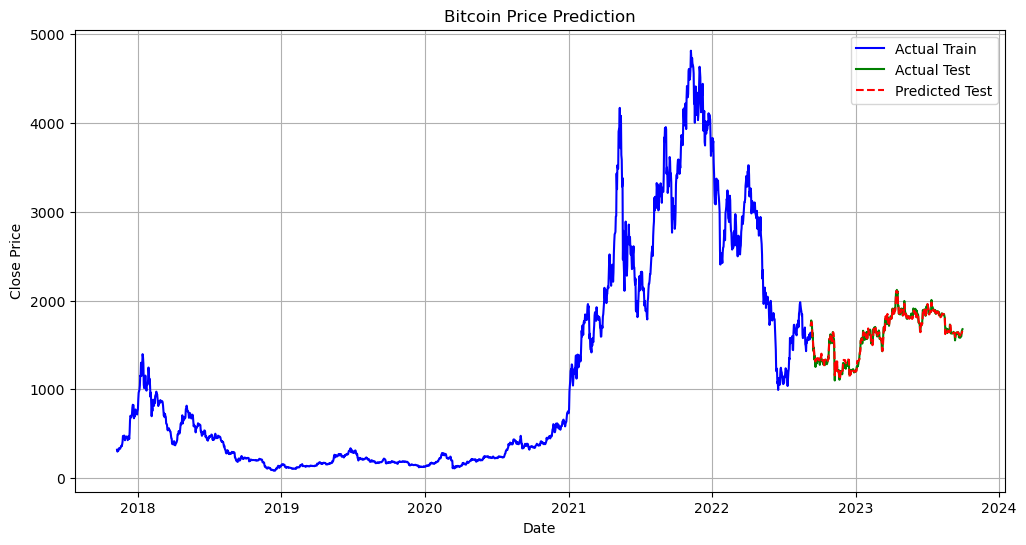

In [14]:
# Combine the predictions with their corresponding dates
train_dates = train_df.index
test_dates = test_df.index
# Plot actual 'Close' values
plt.figure(figsize=(12, 6))
plt.plot(train_dates, ytrain2, label='Actual Train', color='blue')
plt.plot(test_dates, ytest2, label='Actual Test', color='green')
# Plot predicted 'Close' values
#plt.plot(train_dates, train_preds, label='Predicted Train', color='red', linestyle='--')
plt.plot(test_dates, test_preds, label='Predicted Test', color='RED', linestyle='--')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Combine the dates, actual 'Close' values, and predictions
results_df2 = pd.DataFrame({
    'Date': train_dates.append(test_dates),
    'Actual Close': np.concatenate([ytrain2, ytest2]),
    'Predicted Close': np.concatenate([train_preds, test_preds])
})
# Set the 'Date' column as the index
results_df2.set_index('Date', inplace=True)
# Display the table
print(results_df2)

            Actual Close  Predicted Close
Date                                     
2017-11-09    320.884003       319.560268
2017-11-10    299.252991       302.974898
2017-11-11    314.681000       312.966448
2017-11-12    307.907990       310.499711
2017-11-13    316.716003       317.661984
...                  ...              ...
2023-09-26   1593.417236      1609.022353
2023-09-27   1597.491211      1624.363658
2023-09-28   1652.882690      1635.592371
2023-09-29   1667.943848      1651.320273
2023-09-30   1677.475098      1643.780353

[2152 rows x 2 columns]


# SUMMARY

K-NEIGHBORS REGRESSION
Training MAE: 163.72
Test MAE: 331.93
Training RMSE: 361.52
Test RMSE: 421.22
Training R2: 1.00
Test R2: 0.99
Training MSE: 130699.18
Test MSE: 177423.74
Test MAPE: 1.41%

XGBOOST REGRESSION
Training MAE: 2.85
Test MAE: 443.42
Training RMSE: 3.83
Test RMSE: 601.55
Training R2: 1.00
Test R2: 0.98
Training MSE: 14.71
Test MSE: 361861.84
Test MAPE: 1.82%

Random Forest Regressor
Training MAE: 72.45
Test MAE: 279.66
Training RMSE: 165.97
Test RMSE: 375.99
Training R2: 1.00
Test R2: 0.99
Training MSE: 27547.61
Test MSE: 141368.50
Test MAPE: 1.18%


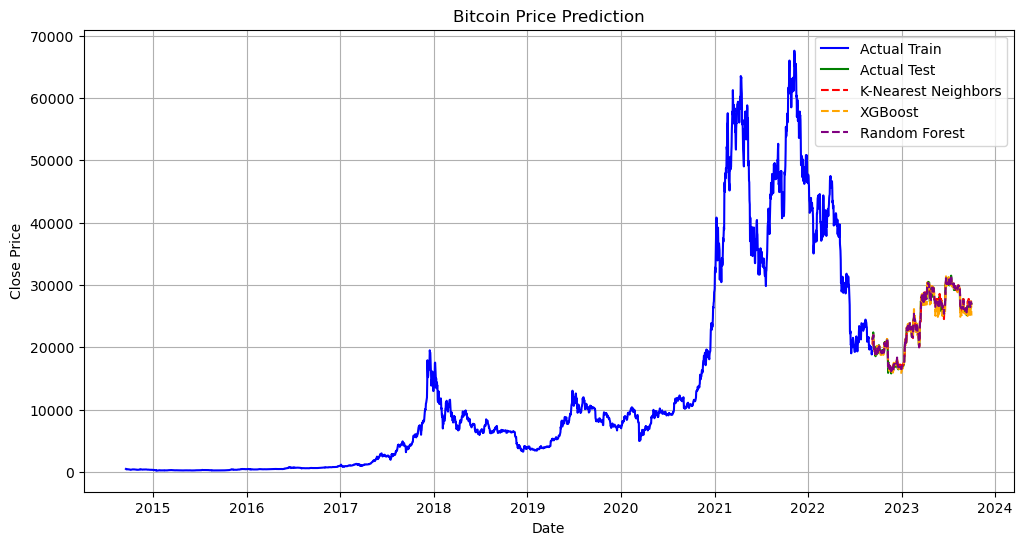


Model Validation Results:
                 Model    Test MAE  Test RMSE   Test R2       Test MSE  \
0  K-Nearest Neighbors  331.928011  421.21698  0.991776  177423.744283   
1              XGBoost  443.420048  601.54953  0.983227  361861.836858   
2        Random Forest  279.657197  375.99002  0.993447  141368.495006   

   Test MAPE (%)  
0       1.406188  
1       1.819163  
2       1.180928  


In [8]:
# Validate the models and print the evaluation metrics
print("K-NEIGHBORS REGRESSION")
print("=================================")
train_preds1, test_preds1 = fit_and_test(pipe1)

print("\nXGBOOST REGRESSION")
print("=================================")
train_preds2, test_preds2 = fit_and_test(pipe2)

print("\nRandom Forest Regressor")
print("=================================")
train_preds3, test_preds3 = fit_and_test(pipe3)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_dates, ytrain2, label='Actual Train', color='blue')
plt.plot(test_dates, ytest2, label='Actual Test', color='green')
plt.plot(test_dates, test_preds1, label='K-Nearest Neighbors', color='red', linestyle='--')
plt.plot(test_dates, test_preds2, label='XGBoost', color='orange', linestyle='--')
plt.plot(test_dates, test_preds3, label='Random Forest', color='purple', linestyle='--')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

plt.show()

# Create a DataFrame for the model validation results
validation_results = pd.DataFrame({
    'Model': ['K-Nearest Neighbors', 'XGBoost', 'Random Forest'],
    'Test MAE': [mean_absolute_error(test_preds1, ytest2), mean_absolute_error(test_preds2, ytest2), mean_absolute_error(test_preds3, ytest2)],
    'Test RMSE': [np.sqrt(mean_squared_error(test_preds1, ytest2)), np.sqrt(mean_squared_error(test_preds2, ytest2)), np.sqrt(mean_squared_error(test_preds3, ytest2))],
    'Test R2': [r2_score(ytest2, test_preds1), r2_score(ytest2, test_preds2), r2_score(ytest2, test_preds3)],
    'Test MSE': [mean_squared_error(test_preds1, ytest2), mean_squared_error(test_preds2, ytest2), mean_squared_error(test_preds3, ytest2)],
    'Test MAPE (%)': [mean_absolute_percentage_error(ytest2, test_preds1) * 100, mean_absolute_percentage_error(ytest2, test_preds2) * 100, mean_absolute_percentage_error(ytest2, test_preds3) * 100]
})

# Print the validation results
print("\nModel Validation Results:")
print(validation_results)
